### Import

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

### Load data

In [239]:
df_raw = pd.read_csv('data/companies.csv')

In [64]:
df_raw.head(5)

,name,industry,office,size,review_counts,salaries_count,jobs_count,interviews_count,benefits_count,website,company_type,revenue,head_quarter,founded,interview_possitive,interview_negative,interview_neutral,interview_difficulty,benefits_score,rating,total_insurance_health_wellness_benefits,health_insurance,dental_insurance,FSA,vision insurance,HSA,life_insurance,supplemental_life_insurance,disability_insurance,occupational_accident_insurance,heakth_care_on_site,mental_health_care,retiree_health_and_medical,accidental_death_and_dismemberment_insurance,total_financial_retirement_benefits,pension_plan,plan_401K,retirement_plan,employee_stock_purcase_plan,performance_bonus,stock_options,equity_incentive_plan,supplemental_workers_compensation,charity_gift_matching,total_family_parenting_benefits,maternity_paternity_leave,work_from_home,fertility_assistance,dependent_care,adoption_assistance,childcare,flexible_hour,military_leave,family_medical_leave,unpaid_extended_leave,total_vacation_time_off_benefits,vacation_paid_time_off,sick_days,paid_holidays,volunteer_time_off,sabbatical,bereavement_leave,total_perk_discounts_benefits,employee_discount,free_lunch_or_snacks,employee_assistance_program,gym_membership,commuter_checks_and_assistance,pet_friendly_worksplace,mobile_phone_discount,company_car,company_social_events,travel_concierge,legal_assistance,total_professional_support_benefits,diversity_program,job_training,professional_development,apprenticeship,tuition_assistance
0,Google,Internet,35 office locations,10000+ Employees,19.4K,43.8K,1.9K,13k,4.7k,https://www.google.com/,Company - Public (GOOG),$10+ billion (USD),"Mountain View, CA",1998.0,61%,15%,23%,3.3,4.7,4.5,13,1,1,1,1,1,1,1,1,1,1,1,1,1,7,0,1,1,0,1,1,1,1,1,8,1,1,0,0,1,1,1,1,1,1,5,1,1,1,1,0,1,11,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,0,1
1,Microsoft,Computer Hardware & Software,34 office locations,10000+ Employees,30.3K,68.8K,5.7K,10k,10k,https://www.microsoft.com/,Company - Public (MSFT),$10+ billion (USD),"Redmond, WA",1975.0,65%,13%,21%,3.1,4.5,4.4,12,1,1,1,1,1,1,1,1,1,1,1,0,1,8,0,1,1,1,1,1,1,1,1,10,1,1,1,1,1,1,1,1,1,1,6,1,1,1,1,1,1,9,1,1,1,1,1,0,1,0,1,1,1,5,1,1,1,1,1
2,Apple,Computer Hardware & Software,25 office locations,10000+ Employees,21.6K,63.6K,4.2K,8.5k,7.1k,https://www.apple.com/,Company - Public (AAPL),$10+ billion (USD),"Cupertino, CA",1976.0,65%,15%,20%,3.0,4.5,4.3,12,1,1,1,1,1,1,1,1,1,0,1,1,1,7,0,1,1,1,0,1,1,1,1,9,1,1,1,1,1,1,0,1,1,1,6,1,1,1,1,1,1,9,1,1,1,1,1,0,1,0,1,1,1,4,1,1,1,0,1
3,US Air Force,Federal Agencies,40 office locations,10000+ Employees,17.1K,19.4K,4.8K,1.0k,7.6k,https://www.af.mil/,Government,$10+ billion (USD),"Washington, DC",1947.0,70%,5%,24%,2.2,4.5,4.2,11,1,1,0,1,0,1,1,1,1,1,1,1,1,4,1,1,1,0,0,0,0,1,0,9,1,0,1,1,1,1,1,1,1,1,6,1,1,1,1,1,1,10,1,1,1,1,1,0,1,1,1,1,1,5,1,1,1,1,1
4,Cisco Systems,Computer Hardware & Software,25 office locations,10000+ Employees,22.4K,42.5K,1.9K,4.3k,8.0k,https://www.cisco.com/,Company - Private,$10+ billion (USD),"San Jose, CA",1984.0,69%,11%,19%,3.0,4.2,4.2,13,1,1,1,1,1,1,1,1,1,1,1,1,1,8,0,1,1,1,1,1,1,1,1,10,1,1,1,1,1,1,1,1,1,1,5,1,1,1,1,0,1,9,1,1,1,1,1,0,1,0,1,1,1,5,1,1,1,1,1


### Data cleaning function

In [240]:
def data_cleaning(df):
    #drop duplicates
    df.drop_duplicates(inplace = True)
    
    # Office column (how many offices, nan = 1 office)
    df['office'] = df.office.str.split(' ', expand = True)[0]
    df['office'].fillna('1', inplace = True)
    df['office'] = pd.to_numeric(df.office)
    
    # change column name
    df.rename(columns = {'heakth_care_on_site': 'health_care_on_site'}, inplace = True)  
    
    # Create category column base on industry column
    df['category'] = df['industry']
      
    for index, indus in enumerate(df['category']):
        if indus in ['Accounting','Legal']:
            df['category'].iloc[index] = 'Accounting & Legal'

        elif indus == 'Aerospace & Defense':
            df['category'].iloc[index] = 'Aerospace & Defense'

        elif indus in ['Food Production','Farm Support Services']:
            df['category'].iloc[index] = 'Agriculture & Forestry'

        elif indus in ['Sports & Recreation','Museums, Zoos & Amusement Parks','Photography',
                       'Movie Theaters','Gambling','Performing Arts']:
            df['category'].iloc[index] = 'Arts, Entertainment & Recreation'

        elif indus == 'Biotech & Pharmaceuticals':
            df['category'].iloc[index] = 'Biotech & Pharmaceuticals'

        elif indus in ['Consulting','Staffing & Outsourcing',
                                    'Architectural & Engineering Services','Membership Organizations',
                                    'Building & Personnel Services','Security Services','Wholesale',
                                    'Research & Development','Advertising & Marketing','Business Service Centers & Copy Shops']:
            df['category'].iloc[index] = 'Business Services'

        elif indus == 'Construction' :
            df['category'].iloc[index] = 'Construction'

        elif indus in ['Health, Beauty, & Fitness','Consumer Product Rental']:
            df['category'].iloc[index] = 'Customer Services'

        elif indus in ['K-12 Education','Education Training Services','Colleges & Universities','Preschool & Child Care']:
            df['category'].iloc[index] = 'Education'

        elif indus in ['Investment Banking & Asset Management','Banks & Credit Unions',
                                    'Financial Transaction Processing','Brokerage Services',
                                    'Lending','Financial Analytics & Research','Stock Exchanges']:
            df['category'].iloc[index] = 'Finance'

        elif indus in ['Federal Agencies','Municipal Governments','State & Regional Agencies']:
            df['category'].iloc[index] = 'Goverment'

        elif indus == 'Health Care Services & Hospitals' :
            df['category'].iloc[index] = 'Health Care Services & Hospitals'

        elif indus in ['Internet','Computer Hardware & Software','IT Services',
                                   'Enterprise Software & Network Solutions']:
            df['category'].iloc[index] = 'Information Technology'

        elif indus in ['Insurance Carriers','Insurance Agencies & Brokerages']:
            df['category'].iloc[index] = 'Insurance'

        elif indus in ['Miscellaneous Manufacturing','Transportation Equipment Manufacturing',
                                    'Health Care Products Manufacturing','Electrical & Electronic Manufacturing',
                                    'Consumer Products Manufacturing','Food & Beverage Manufacturing',
                                    'Industrial Manufacturing','Chemical Manufacturing','Metal & Mineral Manufacturing']:
            df['category'].iloc[index] = 'Manufacturing'

        elif indus in ['Motion Picture Production & Distribution','TV Broadcast & Cable Networks',
                                    'Music Production & Distribution','Video Games','News Outlet','Radio','Publishing']:
            df['category'].iloc[index] = 'Media'

        elif indus in ['Social Assistance','Health Fundraising Organizations',
                                    'Grantmaking Foundations','Religious Organizations']:
            df['category'].iloc[index] = 'Non-Profit'

        elif indus in ['Oil & Gas Exploration & Production','Energy','Oil & Gas Services','Utilities','Mining']:
            df['category'].iloc[index] = 'Oil, Gas, Energy & Utilities'

        elif indus == 'Real Estate':
            df['category'].iloc[index] = 'Real Estate'

        elif indus in ['Fast-Food & Quick-Service Restaurants','Casual Restaurants',
                       'Catering & Food Service Contractors','Upscale Restaurants']:
            df['category'].iloc[index] = 'Restaurants, Bars & Food Services'

        elif indus in ['General Merchandise & Superstores','Department, Clothing, & Shoe Stores',
                                    'Home Furniture & Housewares Stores','Home Centers & Hardware Stores',
                                    'Grocery Stores & Supermarkets','Consumer Electronics & Appliances Stores',
                                    'Drug & Health Stores','Food & Beverage Stores','Pet & Pet Supplies Stores',
                                    'Beauty & Personal Accessories Stores','Automotive Parts & Accessories Stores',
                                    'Other Retail Stores','Office Supply Stores','Vehicle Dealers',
                                    'Sporting Goods Stores','Toy & Hobby Stores',
                                    'Commercial Equipment Repair & Maintenance','General Repair & Maintenance',
                                    'Veterinary Services','Auctions & Galleries','Commercial Equipment Rental',
                                    'Media & Entertainment Retail Stores','Gift, Novelty & Souvenir Stores']:
            df['category'].iloc[index] = 'Retail'

        elif indus in ['Telecommunications Services','Cable, Internet & Telephone Providers',
                                    'Telecommunications Manufacturing']:
            df['category'].iloc[index] = 'Telecommunications'

        elif indus in ['Logistics & Supply Chain','Express Delivery Services','Transportation Management',
                       'Rail','Trucking','Bus Transportation Services', 'Truck Rental & Leasing','Gas Stations',
                      'Convenience Stores & Truck Stops','Shipping']:
            df['category'].iloc[index] = 'Transportation & Logistics'

        elif indus in ['Hotels, Motels, & Resorts','Airlines','Car Rental','Cruise Ships','Travel Agencies']:
            df['category'].iloc[index] = 'Travel & Tourism'


    # convert review_counts,salaries_count,jobs_count,interviews_count,benefits_count into numeric

    # review counts
    df.review_counts[df.review_counts == '--'] = '0'
    df.review_counts = (df.review_counts.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.review_counts.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    # salaries review count
    df.salaries_count[df.salaries_count == '--'] = '0'
    df.salaries_count = (df.salaries_count.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.salaries_count.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    #jobs review counts
    df.jobs_count[df.jobs_count == '--'] = '0'
    df.jobs_count = (df.jobs_count.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.jobs_count.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    # inteviews review counts
    df.interviews_count[df.interviews_count == '--'] = '0'
    df.interviews_count = (df.interviews_count.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.interviews_count.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    
    # benefits review counts
    df.benefits_count[df.benefits_count == '--'] = '0'
    df.benefits_count = (df.benefits_count.replace(r'[K,k]+$', '', regex=True).astype(float) * \
         df.benefits_count.str.extract(r'[\d\.]+([K,k]+)', expand=False)
        .fillna(1)
        .replace(['K','k'], [10**3,10**3]).astype(int))
    
    
    # founded column
    df.founded.fillna(round(df.founded.mean(),0), inplace = True)
    
    # company size
    
    # 1  = less 5000 employees
    # 2 = 5001 to 10000 employees
    # 3 = 10000+ employees
    df['size'] = df['size'].map({'10000+ Employees': 3,
                             '5001 to 10000 Employees':2, 
                             '1001 to 5000 Employees' : 1,
                             '201 to 500 Employees' : 1,
                             '501 to 1000 Employees' : 1,
                             '1 to 50 Employees': 1,
                             'Unknown' :1})
    
    # delete null values 
    df.dropna(inplace = True)
    
    #interview_possitive, negative, neutral
    df.interview_possitive = pd.to_numeric(df.interview_possitive.str.strip('%'))/100
    df.interview_negative = pd.to_numeric(df.interview_negative.str.strip('%'))/100
    df.interview_neutral = pd.to_numeric(df.interview_neutral.str.strip('%'))/100
    
    # 1 = 'Unknown / Non-Applicable'
    # 2 = 'Less than $100 million (USD)'
    # 3 = '$100 to $500 million (USD)'
    # 4 = '$500 million to $1 billion (USD)'
    # 5 = '$1 to $2 billion (USD)'
    # 6 = '$2 to $5 billion (USD)' 
    # 7 = '$5 to $10 billion (USD)'
    # 8 = '$10+ billion (USD)'

    df['revenue'] = df['revenue'].map({'$10+ billion (USD)':8, 
                                       '$5 to $10 billion (USD)':7,
                                       '$2 to $5 billion (USD)' :6,
                                        '$1 to $2 billion (USD)':5,
                                       '$500 million to $1 billion (USD)':4,
                                       '$100 to $500 million (USD)' :3,
                                       '$50 to $100 million (USD)':2,               
                                        '$25 to $50 million (USD)':2, 
                                        '$10 to $25 million (USD)':2,                                    
                                        '$5 to $10 million (USD)':2,
                                        '$1 to $5 million (USD)':2,
                                        'Less than $1 million (USD)':2,  
                                        'Unknown / Non-Applicable':1})
    
    #company type
    df.company_type[df.company_type.str.contains('Public')] = 'Public'
    df.company_type[df.company_type.str.contains('Private')] = 'Private'
    df['company_type'] = df['company_type'].map({'Public' :'Public',
                                                 'Private' :'Private',
                                                'Subsidiary or Business Segment':'Subsidiary or Business Segment',
                                                'College / University':'Education',
                                                'Nonprofit Organization': 'Nonprofit Organization',
                                                 'Government': 'Government',
                                                 'Hospital':'Hospital',
                                                 'School / School District': 'Education',
                                                 'Franchise': 'Others',
                                                 'Unknown':'Others',
                                                 'Self-employed':'Others',
                                                 'Contract':'Others'})   

    
    return df

### Call data cleaning fuction

In [241]:
df = data_cleaning(df_raw)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-240-977afcba0733>:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review_counts[df.review_counts == '--'] = '0'
<ipython-input-240-977afcba0733>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.salaries_count[df.salaries_count == '--'] = '0'
<ipython-i

### Create company rank classification base on rating

In [242]:
# Create company rank column 
df['company_rank'] = df['rating']
for index, rk in enumerate(df['company_rank']):
    if rk >= 4.2:
        df['company_rank'].iloc[index] = 3
    elif (rk >= 3.9) & (rk < 4.2) :
        df['company_rank'].iloc[index] = 2
    else:# rk < 3.9:
        df['company_rank'].iloc[index] = 1
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [249]:
df['company_rank'] = df['company_rank'].astype(int)

In [250]:
df['company_rank'].value_counts()

2    915
1    773
3    545
Name: company_rank, dtype: int64

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2648
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2233 non-null   object 
 1   industry                                      2233 non-null   object 
 2   office                                        2233 non-null   int64  
 3   size                                          2233 non-null   int64  
 4   review_counts                                 2233 non-null   float64
 5   salaries_count                                2233 non-null   float64
 6   jobs_count                                    2233 non-null   float64
 7   interviews_count                              2233 non-null   float64
 8   benefits_count                                2233 non-null   float64
 9   website                                       2233 non-null   o

In [416]:
df[['name','rating']].sort_values('rating', ascending= False).head(30)

,name,rating
849,Asana,4.9
848,Sammons Financial Group Companies,4.8
854,Bergstrom Automotive,4.8
49,NVIDIA,4.8
858,Intermedia,4.8
857,KnowBe4,4.8
855,eXp Realty,4.8
856,Curriculum Associates,4.8
853,Five9,4.8
851,Family First Life,4.8


In [277]:
size_df = pd.DataFrame(df.groupby('size').agg('mean')['company_rank'])

### Less than 5000 employees company has the best rank 

''

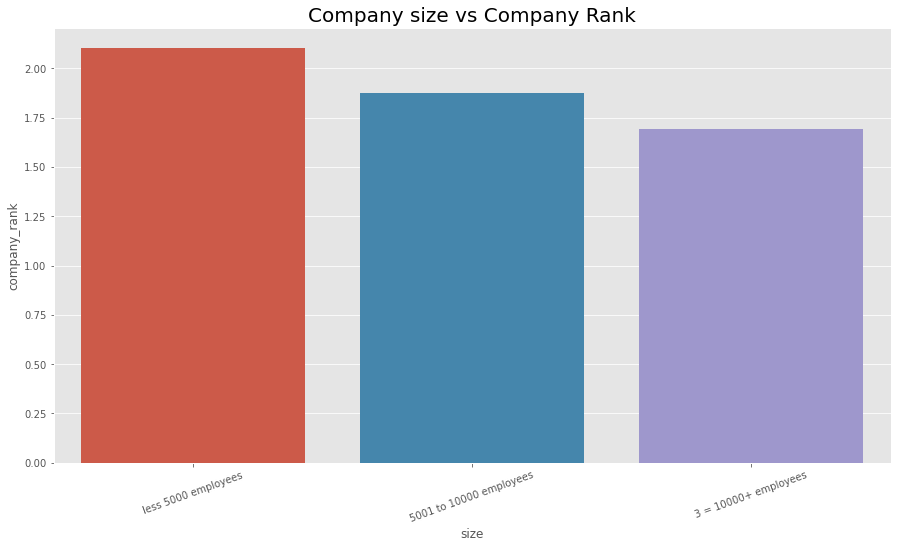

In [279]:
# 1  = less 5000 employees
# 2 = 5001 to 10000 employees
# 3 = 10000+ employees
plt.figure(figsize = (15,8))
sns.barplot(x = 'size', y = 'company_rank', data= size_df.reset_index().sort_values('company_rank'))
plt.xticks([0,1,2],['less 5000 employees','5001 to 10000 employees','3 = 10000+ employees'],rotation = 20)
plt.title('Company size vs Company Rank', fontsize = 20)
;


In [252]:
category_df = pd.DataFrame(df.groupby('category').agg('mean')['company_rank'])

In [283]:
category_df.sort_values('company_rank')

,company_rank
category,
Retail,1.405797
Transportation & Logistics,1.432432
"Restaurants, Bars & Food Services",1.532468
Insurance,1.740260
Business Services,1.750000
Telecommunications,1.758621
Health Care Services & Hospitals,1.783186
Travel & Tourism,1.785714
"Arts, Entertainment & Recreation",1.846154


### Biotech & Pharmaceuticals, Non-Profit, Construction, Real Estate, Education are the top 5

''

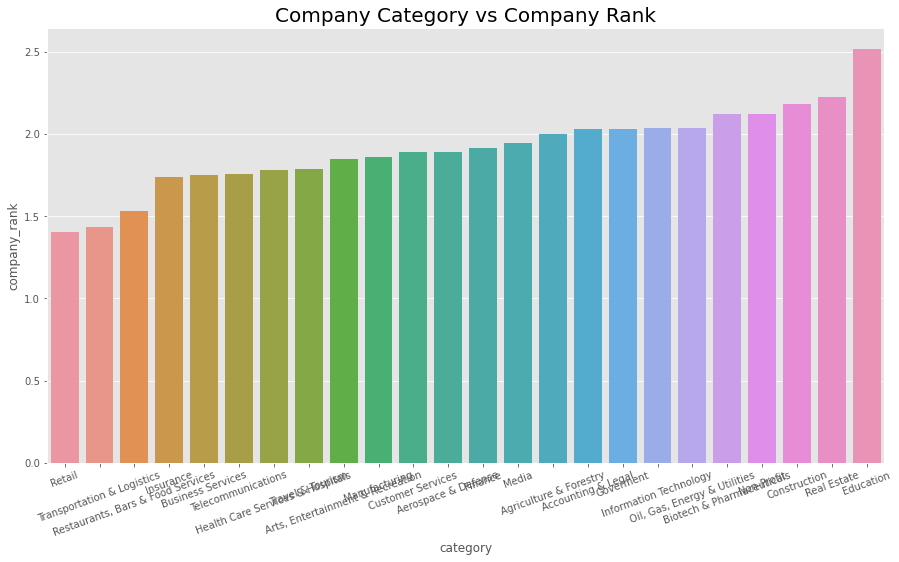

In [272]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'category', y = 'company_rank', data= category_df.reset_index().sort_values('company_rank'))
plt.xticks(rotation = 20)
plt.title('Company Category vs Company Rank', fontsize = 20)
;


In [255]:
revenue_df = pd.DataFrame(df.groupby('revenue').agg('mean')['company_rank'])

### Company with  100 to 500 million (USD) revenue is the best

''

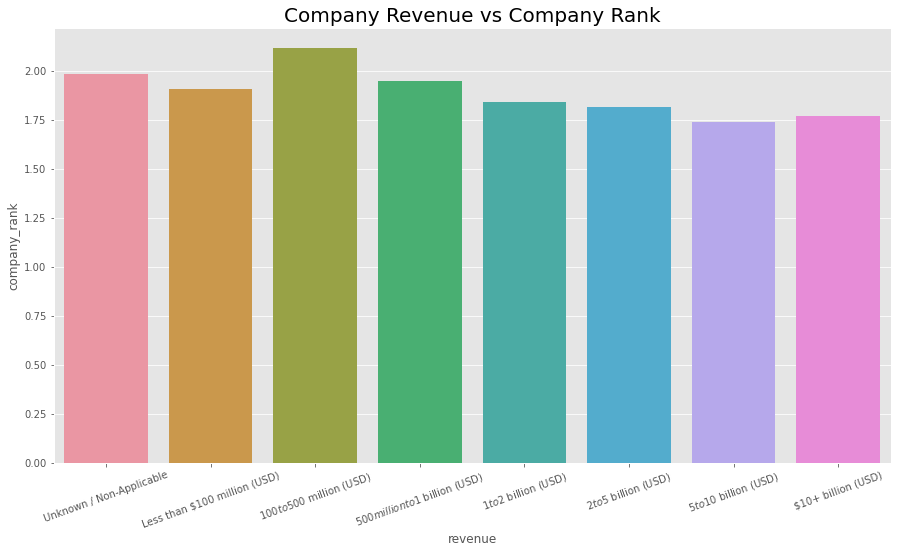

In [266]:
# 1 = 'Unknown / Non-Applicable'
    # 2 = 'Less than $100 million (USD)'
    # 3 = '$100 to $500 million (USD)'
    # 4 = '$500 million to $1 billion (USD)'
    # 5 = '$1 to $2 billion (USD)'
    # 6 = '$2 to $5 billion (USD)' 
    # 7 = '$5 to $10 billion (USD)'
    # 8 = '$10+ billion (USD)'

plt.figure(figsize = (15,8))
sns.barplot(x = 'revenue', y = 'company_rank', data= revenue_df.reset_index().sort_values('company_rank'))
plt.xticks(rotation = 45)
plt.title('Company Revenue vs Company Rank', fontsize = 20)
plt.xticks([0, 1, 2,3,4,5,6,7], ['Unknown / Non-Applicable','Less than $100 million (USD)','$100 to $500 million (USD)',
                        '$500 million to $1 billion (USD)','$1 to $2 billion (USD)','$2 to $5 billion (USD)', 
                        '$5 to $10 billion (USD)','$10+ billion (USD)'],rotation=20)
;


### The more difficult interview, a company is the better. Gym membership and work from home can boost company rank

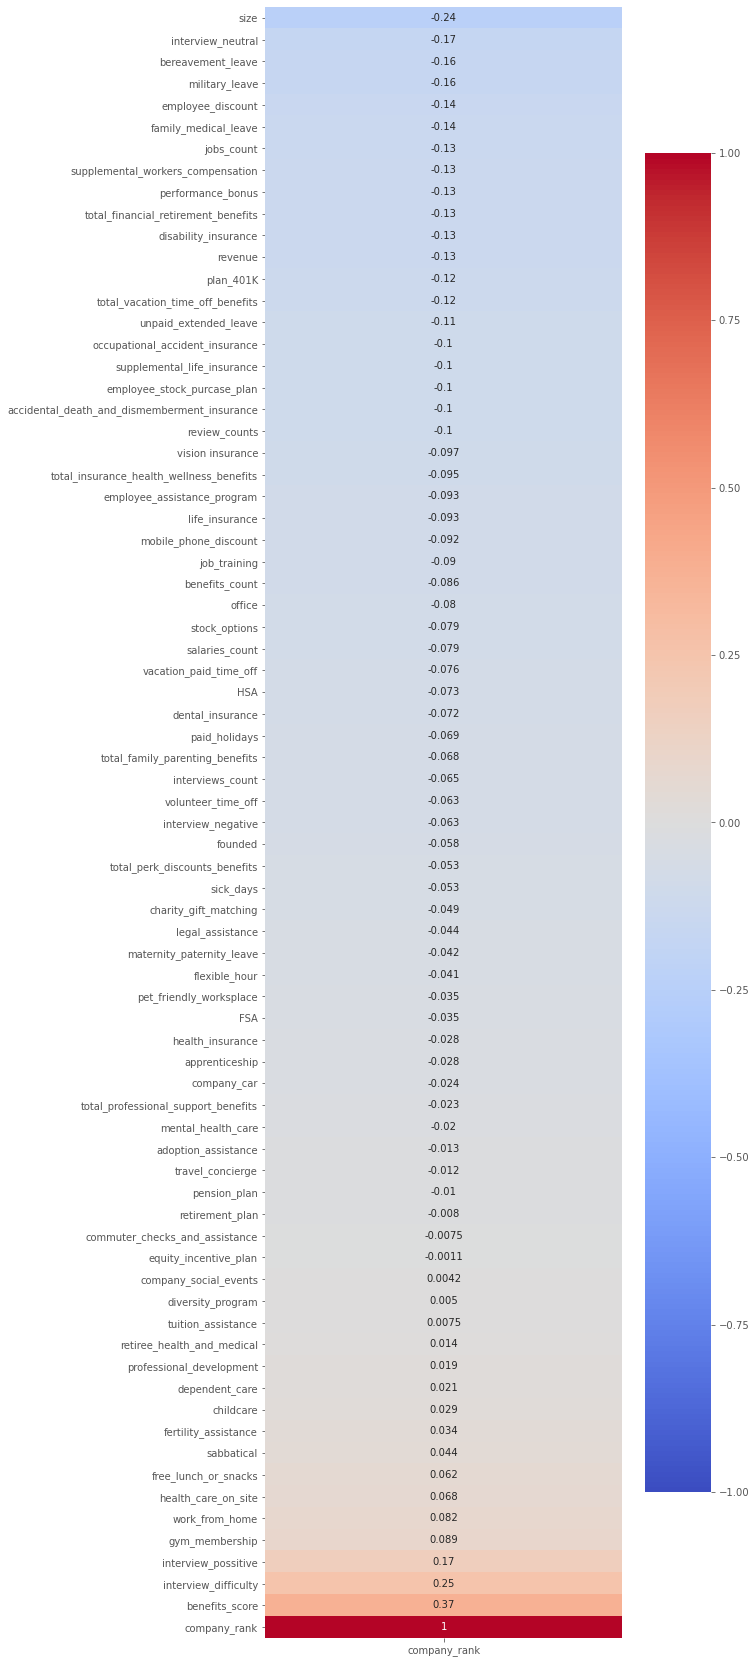

In [276]:
# code from global lesson 3.07
plt.figure(figsize=(8, 30))
sns.heatmap(df.drop(columns = ['rating']).corr()[['company_rank']].sort_values('company_rank'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

### Save the clean data into csv file

In [284]:
df.to_csv('data/clean_df.csv', index = False)